In [1]:
from pandas.api.types import CategoricalDtype

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
%matplotlib inline
import pandas as pd

import missingno as msno

In [2]:
data = pd.read_csv('/Users/ahmetduzduran/Projects/PJATK-Master/SoccerStonks/data/raw/players_3120.csv')
data.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,...,14,1875,377,3,49,72,83,84,28,NaN
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,...,8,1651,351,1,72,54,61,70,44,NaN
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,...,6,1897,409,1,85,74,78,85,31,NaN
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,...,8,1644,353,1,72,50,59,66,52,NaN
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,...,10,1960,405,1,72,70,80,81,52,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      3120 non-null   object 
 1   Age                       3120 non-null   int64  
 2   Overall rating            3120 non-null   object 
 3   Potential                 3120 non-null   object 
 4   Team & Contract           3120 non-null   object 
 5   ID                        3120 non-null   int64  
 6   Height                    3120 non-null   object 
 7   Weight                    3120 non-null   object 
 8   foot                      3120 non-null   object 
 9   Best overall              3120 non-null   int64  
 10  Best position             3120 non-null   object 
 11  Growth                    3120 non-null   int64  
 12  Value                     3120 non-null   object 
 13  Wage                      3120 non-null   object 
 14  Release 

In [4]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,3120.0,24.218590,4.876116,16.0,20.00,23.0,27.00,44.0
ID,3120.0,236637.525321,39161.333184,41.0,224285.00,243017.0,262621.00,279922.0
Best overall,3120.0,74.368910,6.430639,49.0,70.00,75.0,79.00,93.0
Growth,3120.0,5.875962,5.714962,0.0,0.00,5.0,10.00,25.0
Total attacking,3120.0,291.675641,72.207131,51.0,267.00,304.0,339.00,440.0
Total skill,3120.0,307.003846,75.263189,61.0,280.00,321.0,357.00,465.0
Total movement,3120.0,349.397756,52.477820,133.0,325.00,359.0,385.00,462.0
Total power,3120.0,328.516026,50.544401,146.0,299.00,335.0,366.00,442.0
Total mentality,3120.0,293.083333,63.164889,72.0,268.00,303.0,334.00,417.0
Total defending,3120.0,155.752564,64.891734,24.0,97.00,174.0,212.00,269.0


In [5]:
data.columns

Index(['name', 'Age', 'Overall rating', 'Potential', 'Team & Contract', 'ID',
       'Height', 'Weight', 'foot', 'Best overall', 'Best position', 'Growth',
       'Value', 'Wage', 'Release clause', 'Total attacking', 'Crossing',
       'Finishing', 'Heading accuracy', 'Short passing', 'Volleys',
       'Total skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long passing',
       'Ball control', 'Total movement', 'Acceleration', 'Sprint speed',
       'Agility', 'Reactions', 'Balance', 'Total power', 'Shot power',
       'Jumping', 'Stamina', 'Strength', 'Long shots', 'Total mentality',
       'Aggression', 'Interceptions', 'Att. Position', 'Vision', 'Penalties',
       'Composure', 'Total defending', 'Defensive awareness',
       'Standing tackle', 'Sliding tackle', 'Total goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total stats', 'Base stats', 'International reputation',
       'Pace / Diving', 'Shooting / Handling', 'Passing / K

In [6]:
data.duplicated().sum()


371

# Preprocessing

In [7]:
data = data.drop_duplicates()

In [8]:
df = data.copy().drop(["ID", "name", "Unnamed: 64", "Team & Contract"], axis=1)

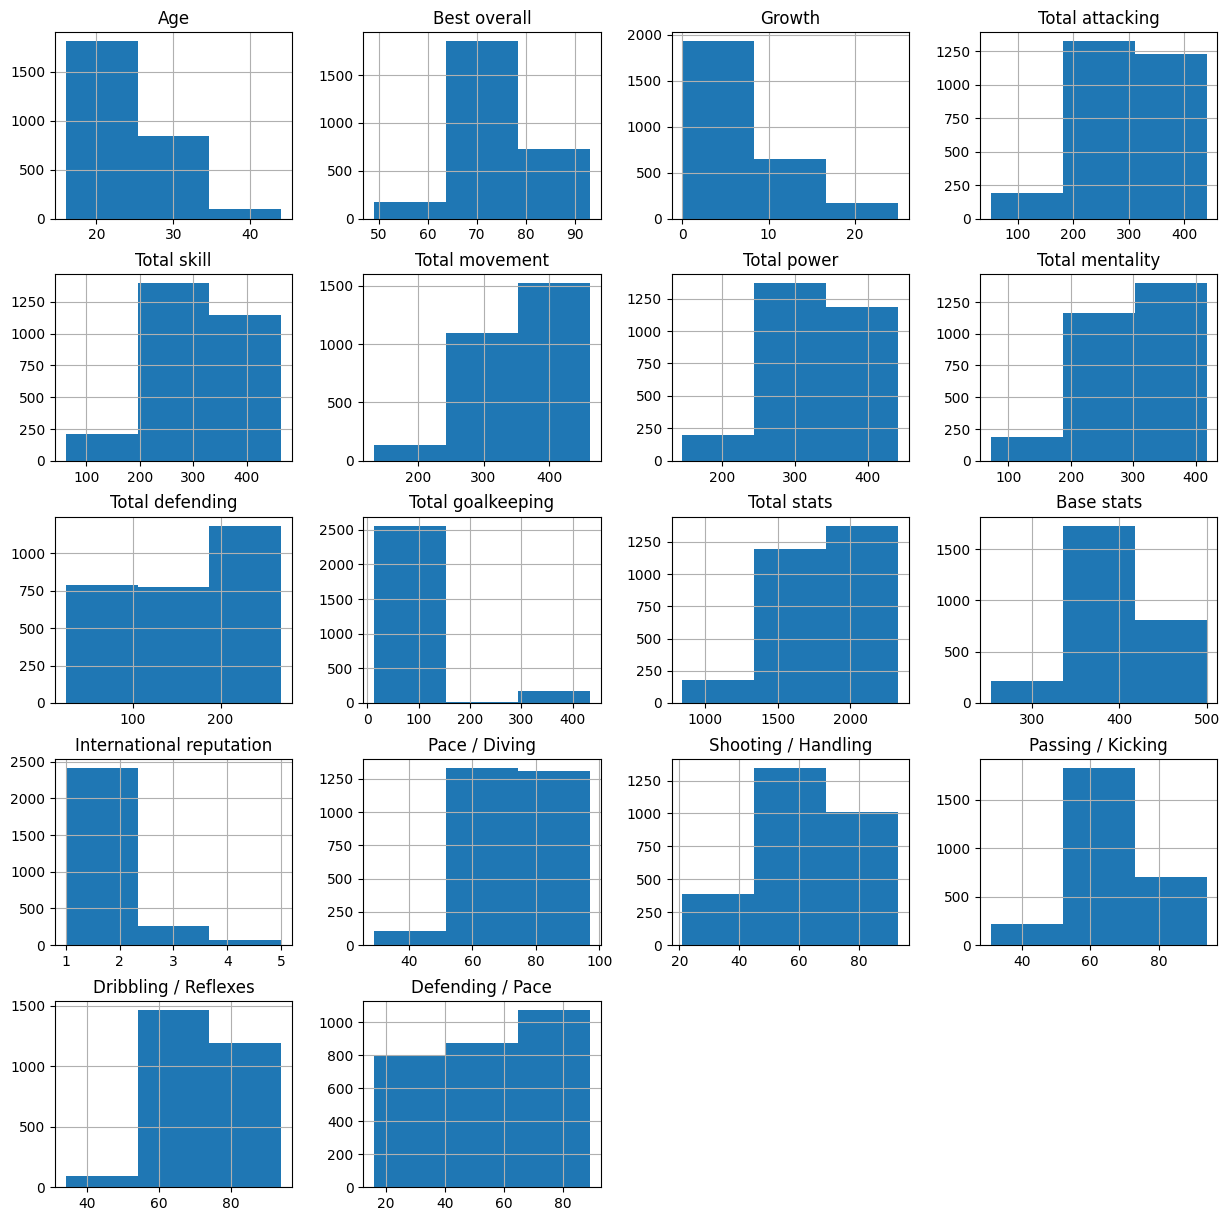

In [9]:
List = df.hist(bins=3, figsize = (15, 15))

In [10]:
# Foot
df['foot'] = data['foot'].replace(["Right", "Left"], [0, 1])
df['foot'] = df['foot'].astype("float")

/var/folders/68/g6z_t1892s1_gvzlq6f4v0100000gn/T/ipykernel_21912/1373632686.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['foot'] = data['foot'].replace(["Right", "Left"], [0, 1])


In [11]:
# Value from € to float
pd.set_option('future.no_silent_downcasting', True)

ValueToFloat = data['Value'].str.strip('€').str.extract(r'(\d+\.?\d*)(K|M)').replace({'M':1000000,'K':1000})
ValueToFloat[0] = pd.to_numeric(ValueToFloat[0], errors='coerce')
df['Value'] = ValueToFloat.prod(axis=1).astype("float64")

# Wage
ValueToFloat = data['Wage'].str.strip('€').str.extract(r'(\d+\.?\d*)(K|M)').replace({'M':1000000,'K':1000})
ValueToFloat[0] = pd.to_numeric(ValueToFloat[0], errors='coerce')
df['Wage'] = ValueToFloat.prod(axis=1).astype("float64")

# Release clause
ValueToFloat = data['Release clause'].str.strip('€').str.extract(r'(\d+\.?\d*)(K|M)').replace({'M':1000000,'K':1000})
ValueToFloat[0] = pd.to_numeric(ValueToFloat[0], errors='coerce')
df['Release clause'] = ValueToFloat.prod(axis=1).astype("float64")

In [12]:
# Height

ValueToInt = df['Height'].str.split("/", expand=True)
ValueToInt.drop(1, axis=1, inplace=True)
ValueToInt[0] = ValueToInt[0].str.replace('cm', "").astype("int")
df['Height'] = ValueToInt

# Weight
ValueToInt = df['Weight'].str.split("/", expand=True)
ValueToInt.drop(1, axis=1, inplace=True)
ValueToInt[0] = ValueToInt[0].str.replace('kg', "").astype("int")
df['Weight'] = ValueToInt

In [13]:
# Team & Contract
import numpy as np
TeamCont = data["Team & Contract"].str.split("\n", expand=True)
TeamCont.drop(0, axis=1, inplace=True)
TeamCont = TeamCont[1].str.split("~", expand=True)
TeamCont[0] = TeamCont[0].str.replace('Jun 30, 2024 On loan', "2023")
TeamCont[0] = TeamCont[0].str.replace('Dec 31, 2024 On loan', "2023")
TeamCont[0] = TeamCont[0].str.replace('Jun 30, 2025 On loan', "2024")
TeamCont[0] = TeamCont[0].str.replace('May 31, 2024 On loan', "2023")
TeamCont[0] = TeamCont[0].str.replace('Free', "2023")
TeamCont[1] = TeamCont[1].fillna(0)

TeamCont[0] = TeamCont[0].astype("float")
TeamCont[1] = TeamCont[1].astype("float")

TeamCont[1] = TeamCont[1].replace([0], np.nan)
TeamCont[1] = TeamCont[1].fillna(TeamCont[0] + 1)

df["Start"] = TeamCont[0]
df["End"] = TeamCont[1]

In [14]:
# Best Position
df["Best position"] = df["Best position"].astype("category")
df["Best position"] = df["Best position"].cat.codes

In [15]:
# Object Columns
def dfObjectSplit(column):
    split = data[column].str.split('+', expand=True)
    split2 = split[0].str.split('-', expand=True)
    df[column] = split2[0]
    df[column] = df[column].astype("float")

In [16]:
columns_to_process = [
    "Overall rating", "Potential", "Crossing", "Finishing", "Heading accuracy", 
    "Short passing", "Volleys", "Dribbling", "Curve", "FK Accuracy", 
    "Long passing", "Ball control", "Acceleration", "Sprint speed", 
    "Agility", "Reactions", "Balance", "Shot power", "Jumping", 
    "Stamina", "Strength", "Long shots", "Aggression", "Interceptions", 
    "Att. Position", "Vision", "Penalties", "Composure", "Defensive awareness",
    "Standing tackle", "Sliding tackle", "GK Diving", "GK Handling", 
    "GK Kicking", "GK Positioning", "GK Reflexes"
]

# Apply the function to each column in the list
for column in columns_to_process:
    dfObjectSplit(column)



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2749 entries, 0 to 3111
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2749 non-null   int64  
 1   Overall rating            2749 non-null   float64
 2   Potential                 2749 non-null   float64
 3   Height                    2749 non-null   int64  
 4   Weight                    2749 non-null   int64  
 5   foot                      2749 non-null   float64
 6   Best overall              2749 non-null   int64  
 7   Best position             2749 non-null   int8   
 8   Growth                    2749 non-null   int64  
 9   Value                     2749 non-null   float64
 10  Wage                      2749 non-null   float64
 11  Release clause            2749 non-null   float64
 12  Total attacking           2749 non-null   int64  
 13  Crossing                  2749 non-null   float64
 14  Finishing    

In [18]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows (optional)
pd.set_option('display.max_colwidth', None) # Show full content of each column

df.head()

,Age,Overall rating,Potential,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Start,End
0,34,78.0,78.0,182,76,0.0,77,0,0,4100000.0,45000.0,1.0,367,84.0,69.0,50.0,82.0,82.0,430,86.0,86.0,87.0,81.0,90.0,313,50.0,48.0,73.0,70.0,72.0,314,74.0,55.0,41.0,72.0,72.0,319,60.0,25.0,66.0,82.0,86.0,0.0,78,25.0,28.0,25.0,54,7.0,14.0,13.0,6.0,14.0,1875,377,3,49,72,83,84,28,2014.0,2016.0
1,19,65.0,81.0,174,65,1.0,67,0,16,1800000.0,3000.0,4500000.0,266,48.0,53.0,49.0,66.0,50.0,304,69.0,52.0,50.0,65.0,68.0,366,76.0,69.0,81.0,61.0,79.0,272,62.0,56.0,63.0,47.0,44.0,264,41.0,37.0,60.0,65.0,61.0,63.0,140,40.0,49.0,51.0,39,10.0,7.0,9.0,5.0,8.0,1651,351,1,72,54,61,70,44,2022.0,2025.0
2,23,82.0,86.0,170,68,0.0,84,0,4,43500000.0,145000.0,92400000.0,328,75.0,76.0,30.0,83.0,64.0,379,84.0,74.0,61.0,75.0,85.0,429,85.0,85.0,89.0,79.0,91.0,332,73.0,60.0,68.0,55.0,76.0,294,44.0,33.0,78.0,81.0,58.0,79.0,84,40.0,23.0,21.0,51,13.0,9.0,13.0,10.0,6.0,1897,409,1,85,74,78,85,31,2019.0,2027.0
3,17,62.0,80.0,178,72,0.0,65,0,18,1000000.0,1.0,2300000.0,257,48.0,53.0,45.0,67.0,44.0,292,66.0,52.0,43.0,65.0,66.0,356,77.0,68.0,78.0,59.0,74.0,267,48.0,58.0,63.0,51.0,47.0,263,47.0,54.0,54.0,59.0,49.0,49.0,161,50.0,55.0,56.0,48,9.0,13.0,7.0,11.0,8.0,1644,353,1,72,50,59,66,52,2024.0,2028.0
4,18,77.0,88.0,175,70,1.0,79,0,11,22000000.0,41000.0,49500000.0,340,80.0,68.0,41.0,81.0,70.0,403,83.0,84.0,76.0,79.0,81.0,380,75.0,69.0,82.0,69.0,85.0,308,72.0,50.0,70.0,43.0,73.0,316,42.0,55.0,68.0,80.0,71.0,77.0,155,52.0,57.0,46.0,58,13.0,10.0,11.0,14.0,10.0,1960,405,1,72,70,80,81,52,2023.0,2029.0


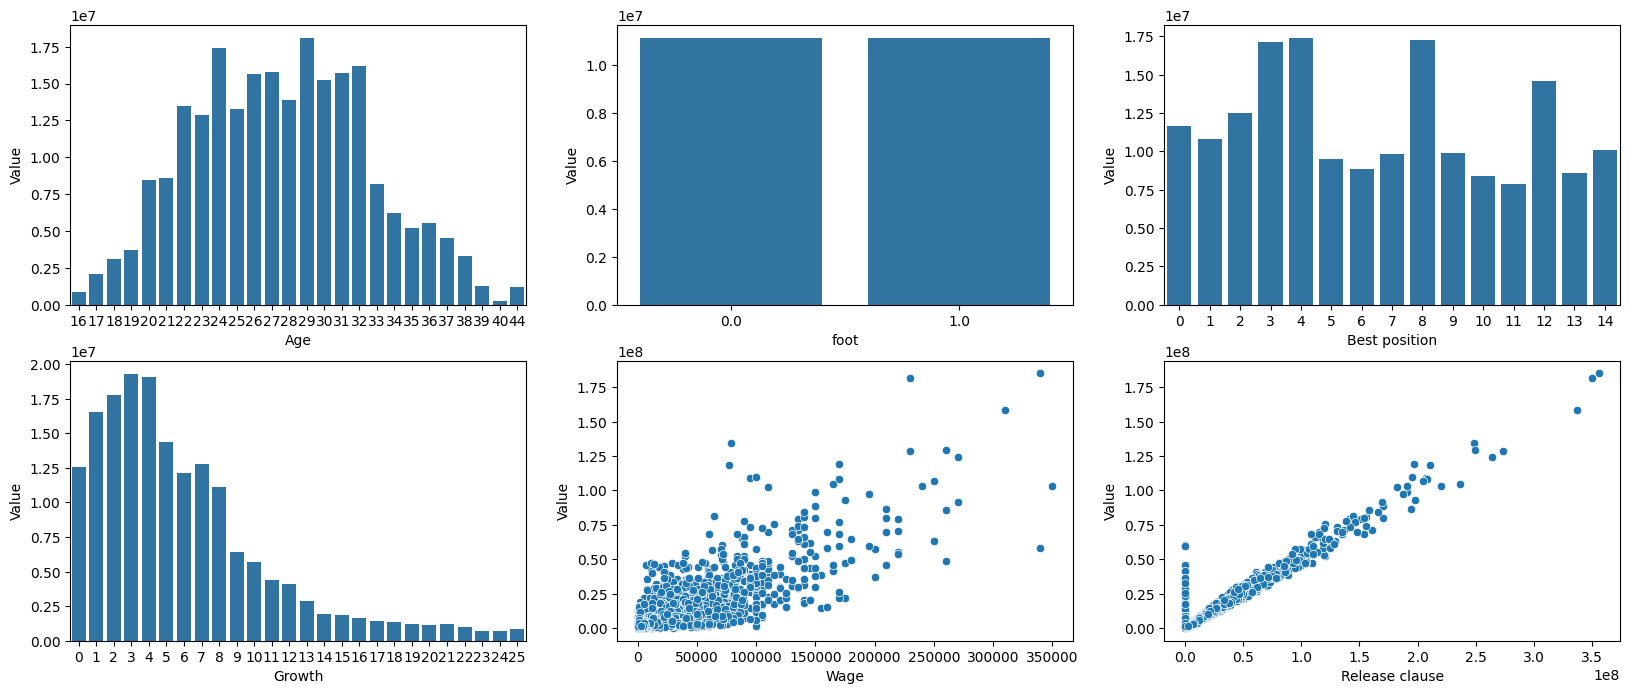

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(20, 8))


age_value_mean = df.groupby('Age', as_index=False)['Value'].mean()
sns.barplot(data=age_value_mean, x='Age', y='Value', ax=ax[0][0])

foot_value_mean = df.groupby('foot', as_index=False)['Value'].mean()
sns.barplot(data=foot_value_mean, x='foot', y='Value', ax=ax[0][1])

best_position_value_mean = df.groupby('Best position', as_index=False)['Value'].mean()
sns.barplot(data=best_position_value_mean, x='Best position', y='Value', ax=ax[0][2])

growth_value_mean = df.groupby('Growth', as_index=False)['Value'].mean()
sns.barplot(data=growth_value_mean, x='Growth', y='Value', ax=ax[1][0])

sns.scatterplot(data=df, x='Wage', y='Value', ax=ax[1][1])

sns.scatterplot(data=df, x='Release clause', y='Value', ax=ax[1][2])

plt.show()

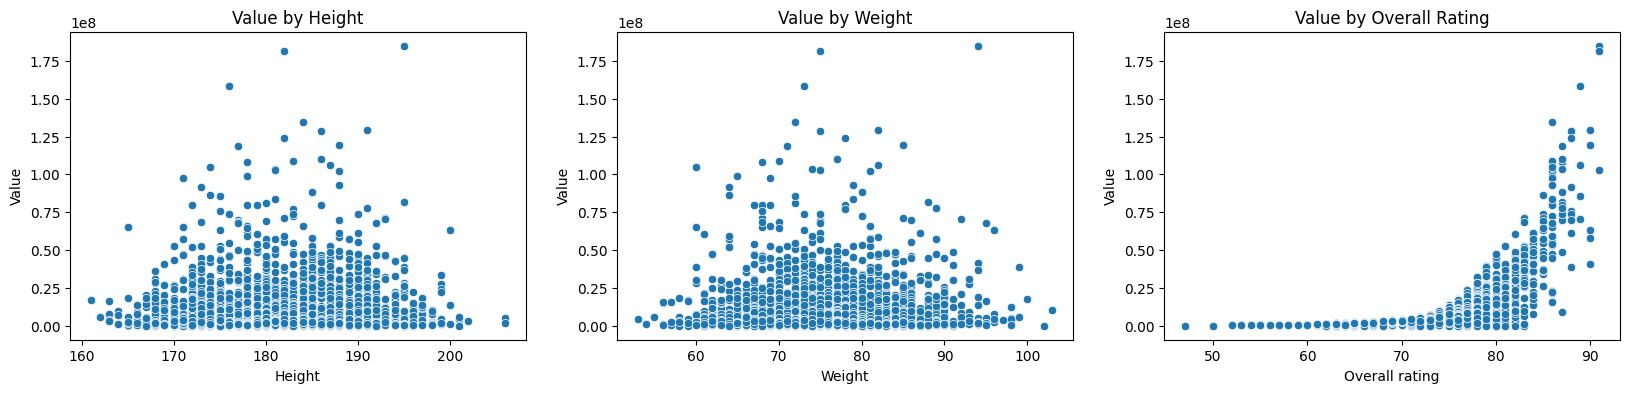

In [20]:
# Set up the figure and axes
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

# Plot the value by height
sns.scatterplot(data=df, x='Height', y='Value', ax=ax[0])
ax[0].set_title('Value by Height')

# Plot the value by weight
sns.scatterplot(data=df, x='Weight', y='Value', ax=ax[1])
ax[1].set_title('Value by Weight')

# Plot the value by overall rating
sns.scatterplot(data=df, x='Overall rating', y='Value', ax=ax[2])
ax[2].set_title('Value by Overall Rating')

# Show the plots
plt.show()

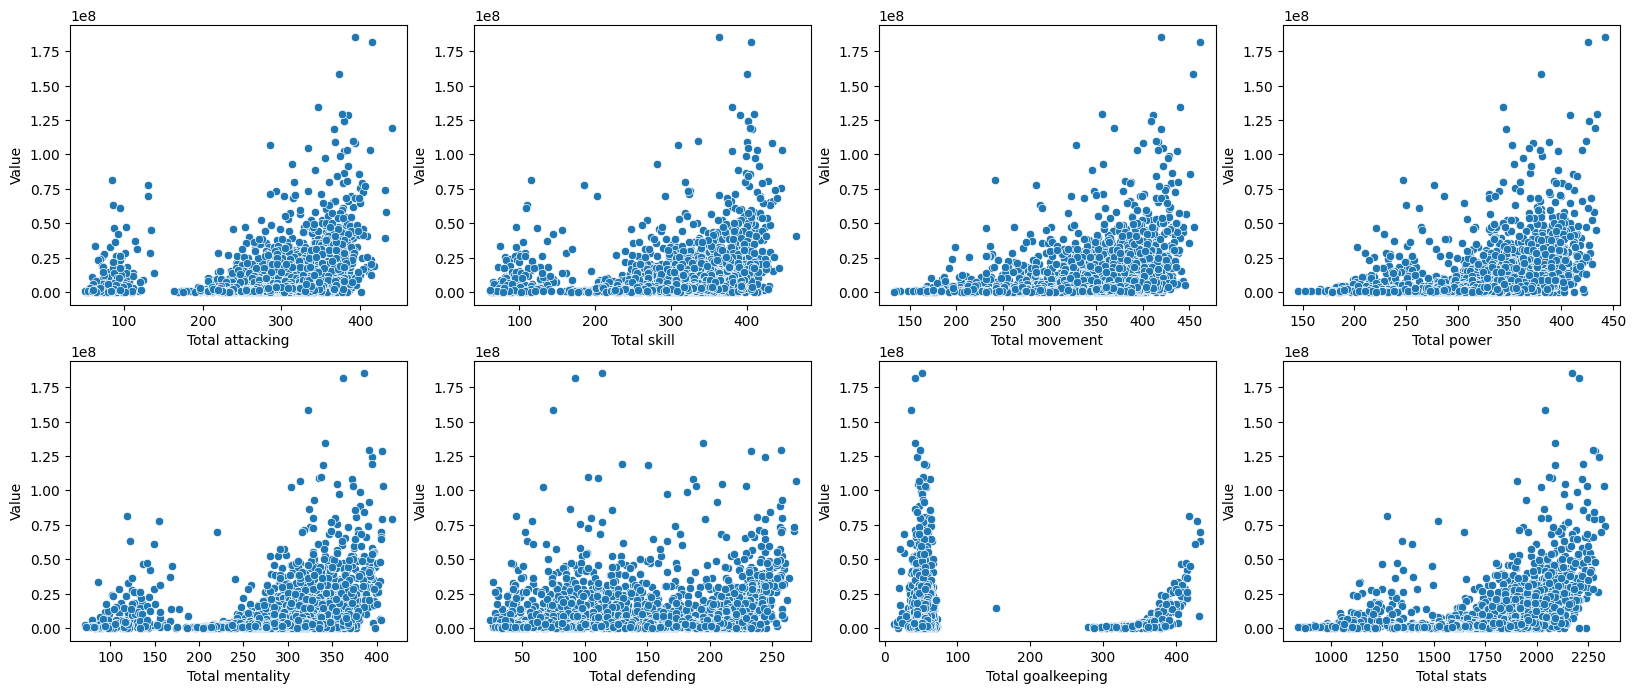

In [21]:
# Set up the figure and axes
fig, ax = plt.subplots(2, 4, figsize=(20, 8))

# Plot the value by total attacking
sns.scatterplot(data=df, x='Total attacking', y='Value', ax=ax[0][0])

# Plot the value by total skill
sns.scatterplot(data=df, x='Total skill', y='Value', ax=ax[0][1])

# Plot the value by total movement
sns.scatterplot(data=df, x='Total movement', y='Value', ax=ax[0][2])

# Plot the value by total power
sns.scatterplot(data=df, x='Total power', y='Value', ax=ax[0][3])

# Plot the value by total mentality
sns.scatterplot(data=df, x='Total mentality', y='Value', ax=ax[1][0])

# Plot the value by total defending
sns.scatterplot(data=df, x='Total defending', y='Value', ax=ax[1][1])

# Plot the value by total goalkeeping
sns.scatterplot(data=df, x='Total goalkeeping', y='Value', ax=ax[1][2])

# Plot the value by total stats
sns.scatterplot(data=df, x='Total stats', y='Value', ax=ax[1][3])

plt.show()

<Axes: >

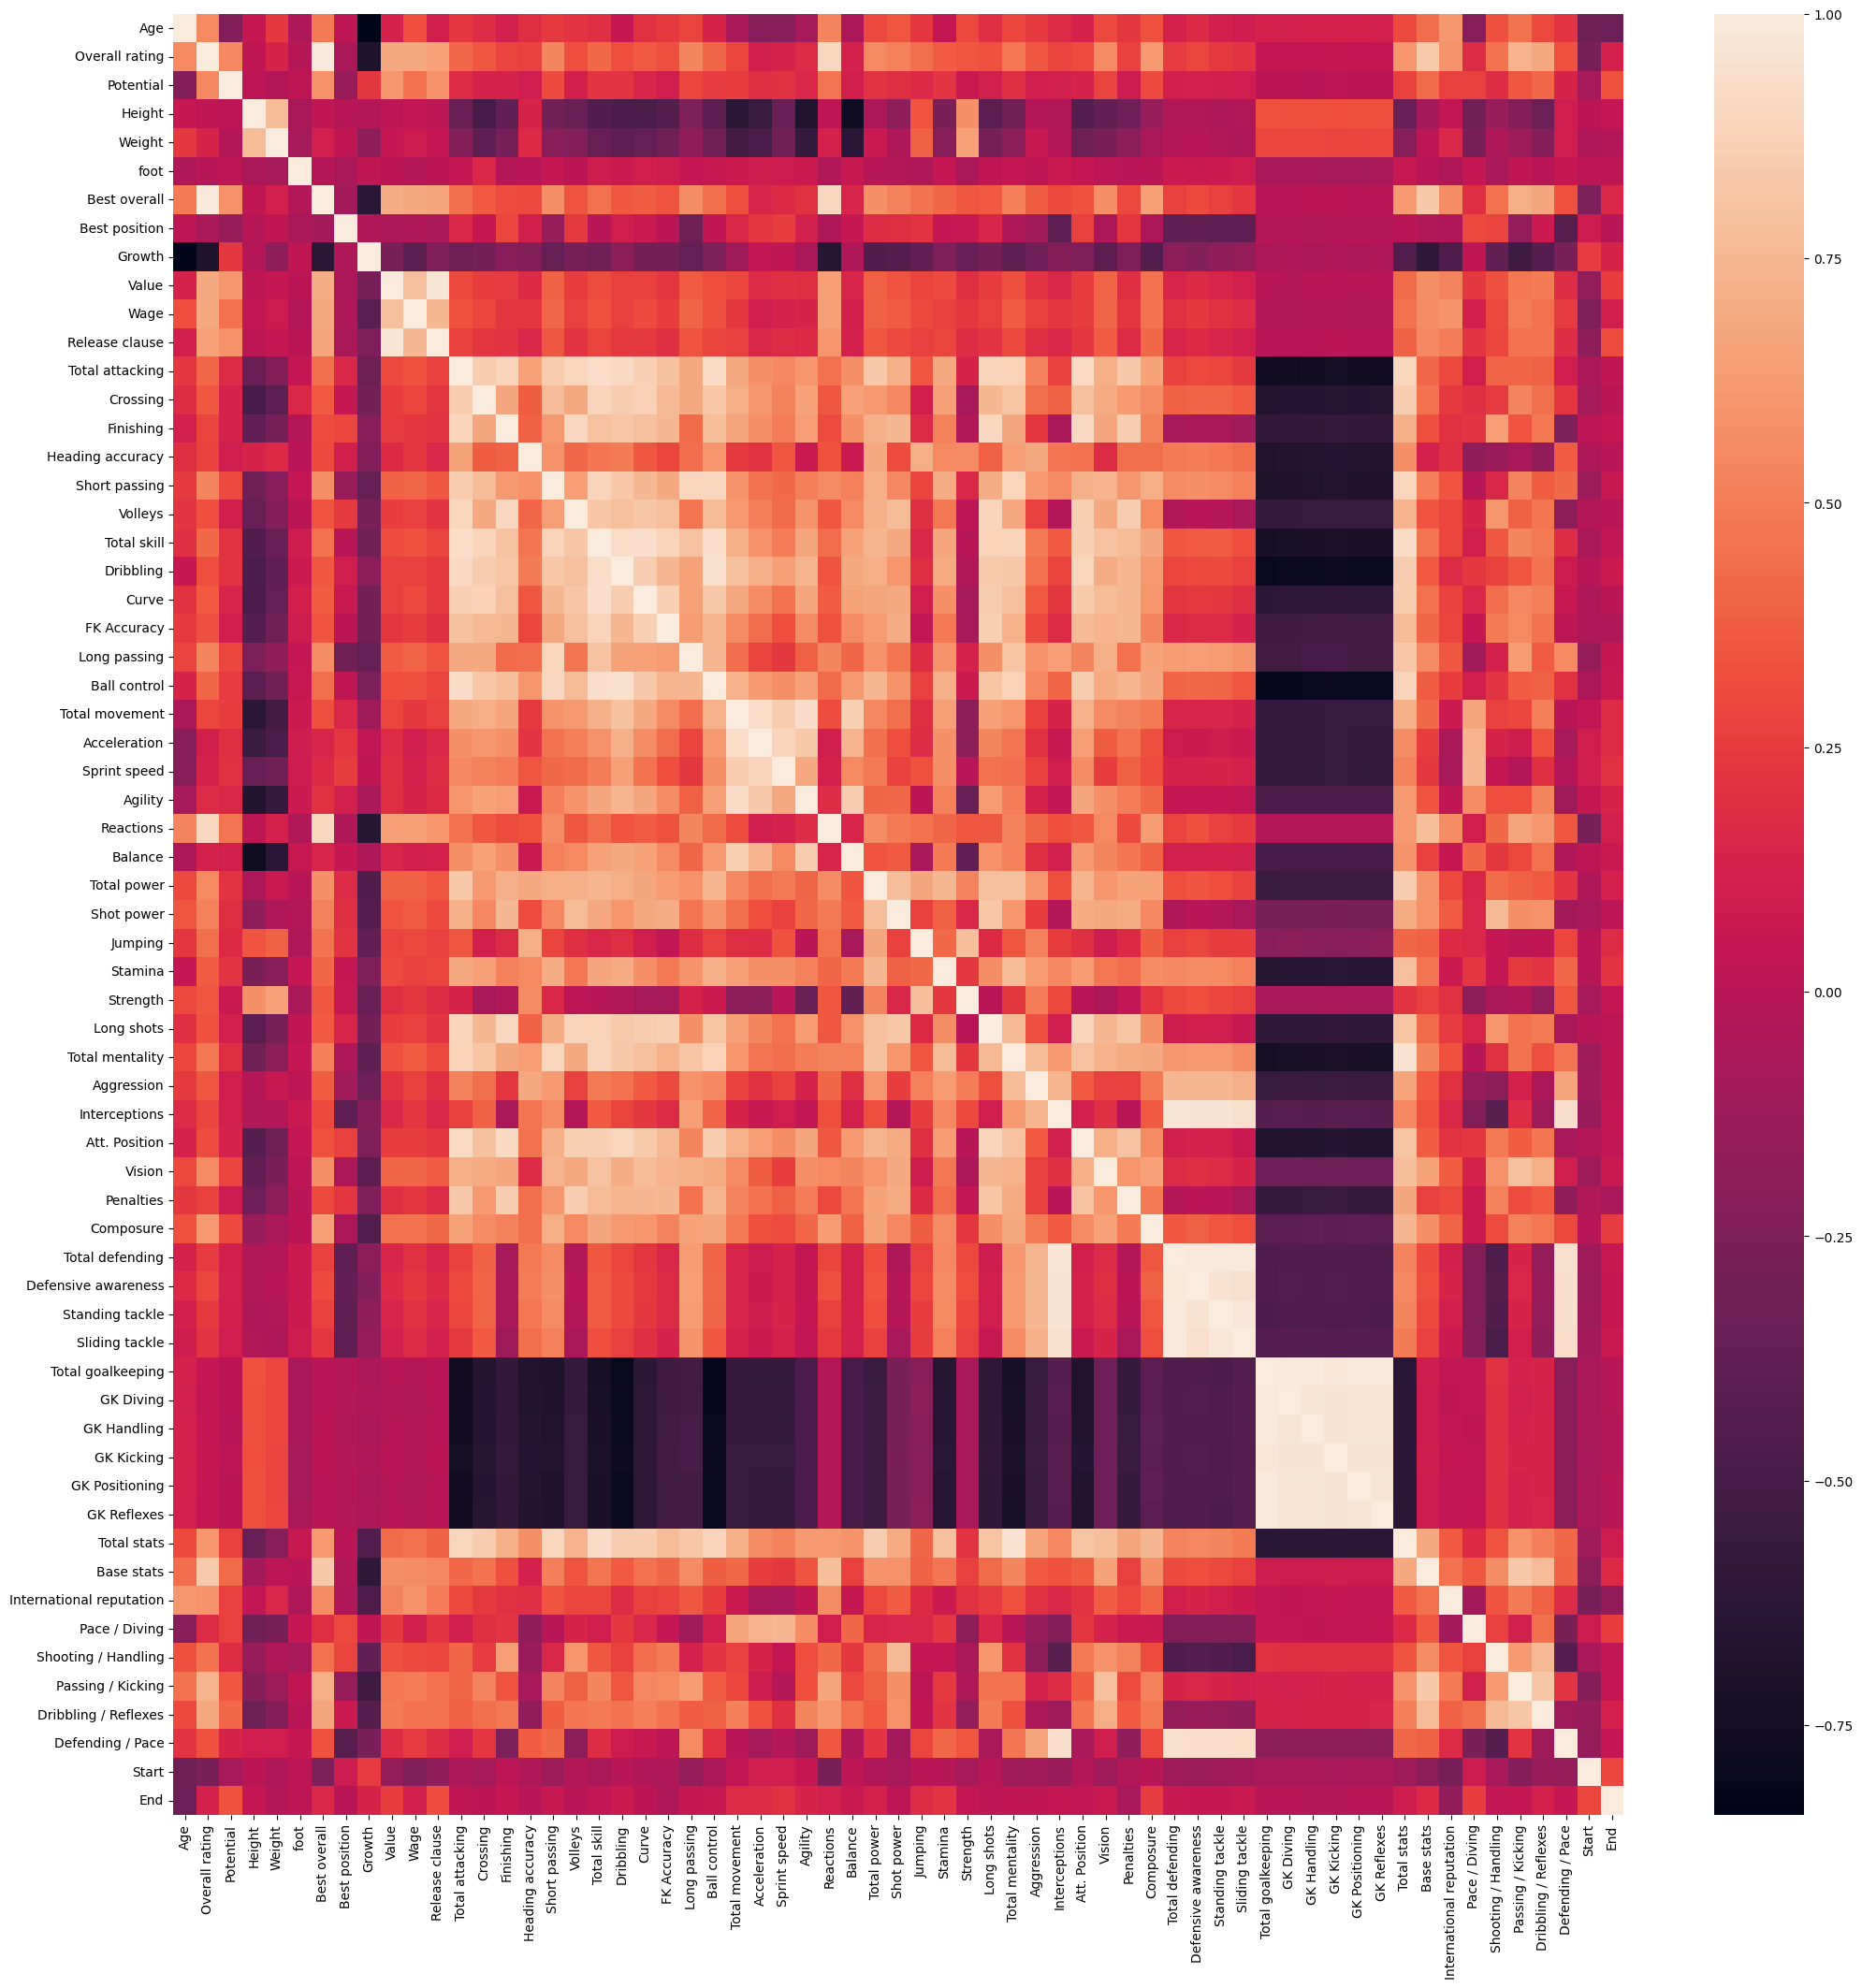

In [22]:
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr())

In [23]:
# Drop some correlated columns
dfDrop = df.copy()

# Total Stats
dfDrop.drop(["Total attacking", "Crossing", "Finishing", "Heading accuracy", "Short passing", "Volleys", "Total skill",
            "Dribbling", "Curve","FK Accuracy","Long passing","Ball control","Total movement","Acceleration","Sprint speed",
             "Agility","Balance","Total power","Shot power","Stamina","Long shots","Total mentality","Aggression",
             "Att. Position","Vision","Penalties","Composure"], axis=1, inplace=True)

# Overall Rating
dfDrop.drop(["Best overall", "Reactions", "Base stats"], axis=1, inplace=True)

# Defending
dfDrop.drop(["Interceptions", "Defensive awareness", "Standing tackle", "Sliding tackle", "Defending / Pace"], axis=1, inplace=True)

# Goalkeeping
dfDrop.drop(["GK Diving", "GK Handling", "GK Kicking", "GK Positioning", "GK Reflexes"], axis=1, inplace=True)

# Passing / Kicking
dfDrop.drop(["Dribbling / Reflexes"], axis=1, inplace=True)


<Axes: >

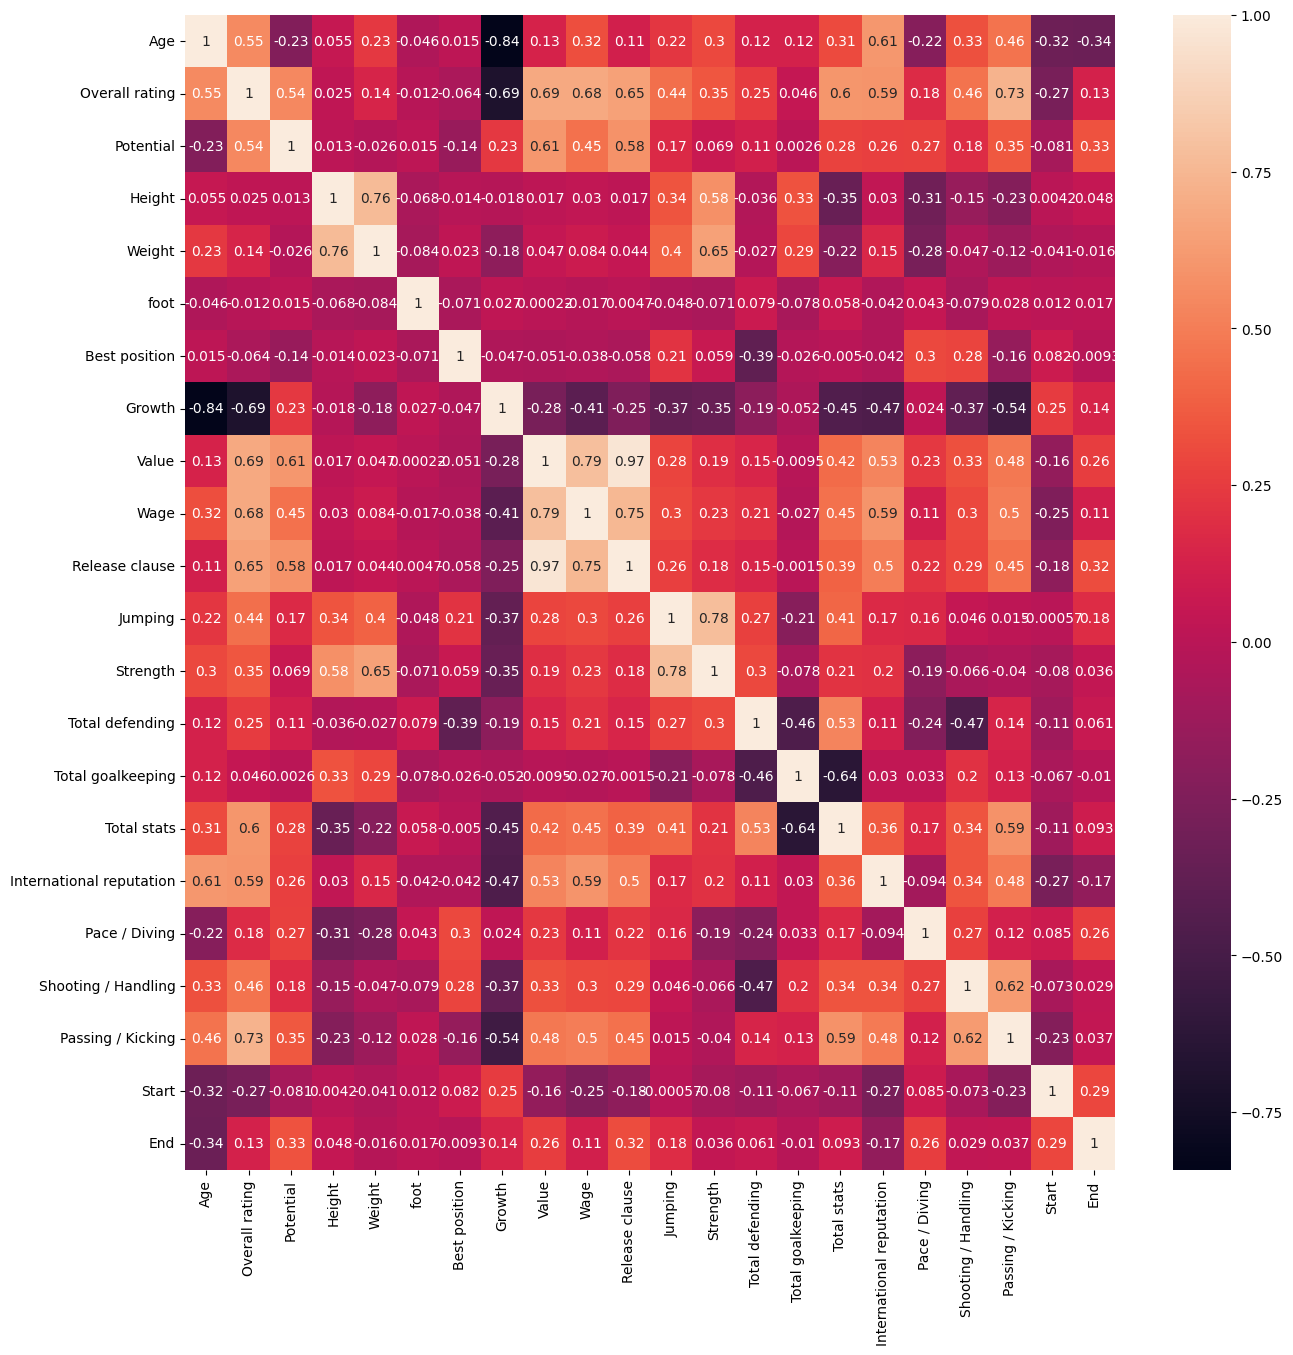

In [24]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(dfDrop.corr(), annot=True)

# Model Building

In [25]:
!brew install libomp
!pip3 install lightgbm

To reinstall 18.1.6, run:
  brew reinstall libomp


In [26]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error

In [27]:
X = dfDrop.drop("Value", axis=1)
y = dfDrop["Value"]

X_t, X_val, y_t, y_val = train_test_split(X, y, train_size = 0.7, shuffle=True, random_state=42)

In [28]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_t, y_t)

RandomForestRegressor(random_state=0)

In [29]:
rf_predict = rf.predict(X_val)

print ("Mean Absolute Error: ", mean_absolute_error(rf_predict, y_val))

Mean Absolute Error:  913564.2338060607
